In [0]:
#Bu kod blogunda gerekli kutuphaneler import edilmistir
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#google colab'e bu dosyayi yuklemek icin ilk once yukarida linki verilen dosyayi indirdim ve (https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) bu linkte verilen 1. adimi uyguladim, 
filmler = pd.read_csv('https://github.com/batuhanozyurt/pythonfinalproje/raw/master/MoviesOnStreamingPlatforms_updated.csv')

In [15]:
#bu kod satirinda "filmler"de boş değer içeren satırları siliyoruz.
filmler.dropna()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [17]:
#bu veriyi incelemek adina ilk once yas sinirlamalarina gore bu filmleri grupladim
#bu amacla ilk once hangi yas sinirlamalari oldugunu ogrenmek icin asagidaki satiri calistirdim. Kaynak: https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
filmler.Age.unique() 

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [0]:
#bu kod satirinda pandas dataframe i python listesine cevirdim
filmler_liste = filmler.values.tolist()

In [0]:
import math

#bu kod blogunda her yas siniri icin bos bir liste olusturdum
yas7_liste = []
yas13_liste = []
yas16_liste = []
yas18_liste = []
tum_yaslar_liste = []
none_yaslar_liste = []

#daha sonra da filmler_liste'de gezinip 4. elemana gore (yani yas sinirlamasi icceren veriyi) veriyi dogru listeye ekliyorum
for eleman in filmler_liste:
  if math.isnan(eleman[5]):#eger IMDB puanı NAN  ise bu elemani pass geciyoruz
    continue
  if eleman[4] == '7+':
    yas7_liste.append(eleman[5])
  elif eleman[4] == '13+':
    yas13_liste.append(eleman[5])
  elif eleman[4] == '16+':
    yas16_liste.append(eleman[5])
  elif eleman[4] == '18+':
    yas18_liste.append(eleman[5])
  elif eleman[4] == 'all':
    tum_yaslar_liste.append(eleman[5])
  else:
    none_yaslar_liste.append(eleman[5])


In [0]:
def ortalama(liste):#bu fonksiyon listenin ortalamasini almamiza yariyor
  return np.mean(liste)

In [0]:
#Ortalamalar listesinde bütün yaş gruplarının IMDB ortalamaları tutulmuş oluyor.
ortalamalar = [ortalama(yas7_liste),
               ortalama(yas13_liste),
               ortalama(yas16_liste),
               ortalama(yas18_liste),
               ortalama(tum_yaslar_liste),
               ortalama(none_yaslar_liste),
               ]
yas_sinirlamalari = ['7','13','16','18','Hepsi','Belirsiz']


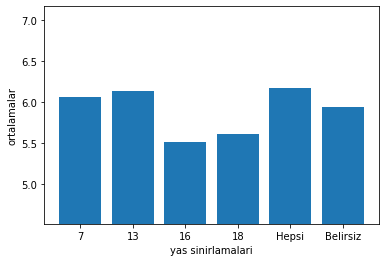

In [27]:
plt.bar(np.arange(len(ortalamalar)),ortalamalar)
plt.xlabel('yas sinirlamalari')
plt.ylabel('ortalamalar')
 
plt.ylim(np.min(ortalamalar)-1,np.max(ortalamalar)+1) #y eksenindeki alt ve üst limiti belirledim.
 
# Create names
plt.xticks(np.arange(len(ortalamalar)), yas_sinirlamalari)
plt.show()
